<a href="https://colab.research.google.com/github/144fl/Mesin-Learning-1/blob/main/Tugas%2011/Muhammad_Afif_Fadhlurrahman_1103210161_CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Afif Fadhlurrahman

NIM  : 1103210161

Tugas : Tugas Week 11

Dataset : CIFAR10

Dokumentasi Chat GPT: https://chatgpt.com/share/082645ea-a4dd-403c-874f-a476ea4cfeb8



In [20]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Impor dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0


**Menampilkan Beberapa Gambar dari Dataset**

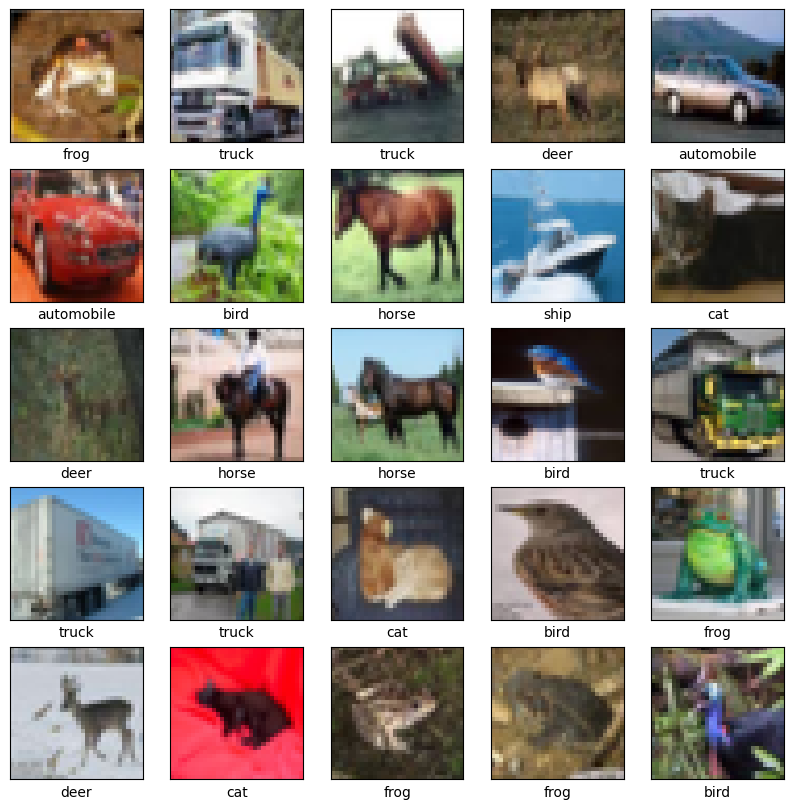

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


Membangun Arsitektur Model CNN

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Menambahkan Lapisan Fully Connected

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Melihat Arsitektur Model

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Kompilasi Model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Melatih Model

In [10]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5647 - accuracy: 0.4250 - val_loss: 1.2586 - val_accuracy: 0.5385
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2037 - accuracy: 0.5746 - val_loss: 1.1168 - val_accuracy: 0.6022
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0493 - accuracy: 0.6329 - val_loss: 1.0359 - val_accuracy: 0.6312
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9588 - accuracy: 0.6650 - val_loss: 0.9559 - val_accuracy: 0.6620
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8833 - accuracy: 0.6892 - val_loss: 0.9374 - val_accuracy: 0.6776
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8315 - accuracy: 0.7079 - val_loss: 0.9173 - val_accuracy: 0.6872
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7813 - accuracy: 0.7252 - val_loss: 0.8778 -

Mengevaluasi Model

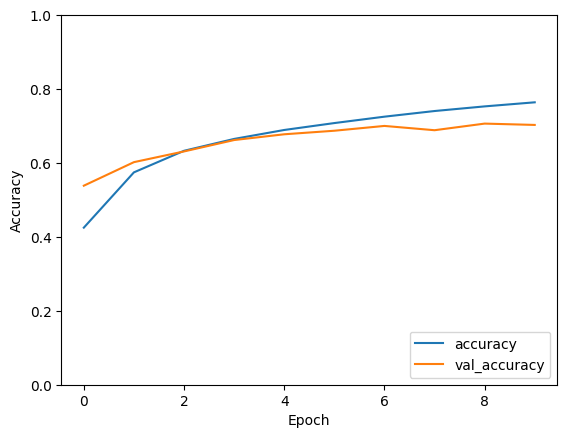

313/313 - 5s - loss: 0.8569 - accuracy: 0.7029 - 5s/epoch - 16ms/step
0.7028999924659729


In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Membuat Prediksi pada Data Uji

In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 4s 12ms/step


Mendefinisikan Fungsi untuk Memvisualisasikan Gambar, Label Sebenarnya, dan Prediksi

In [14]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label[0]]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

Membuat dan Menampilkan Confusion Matrix

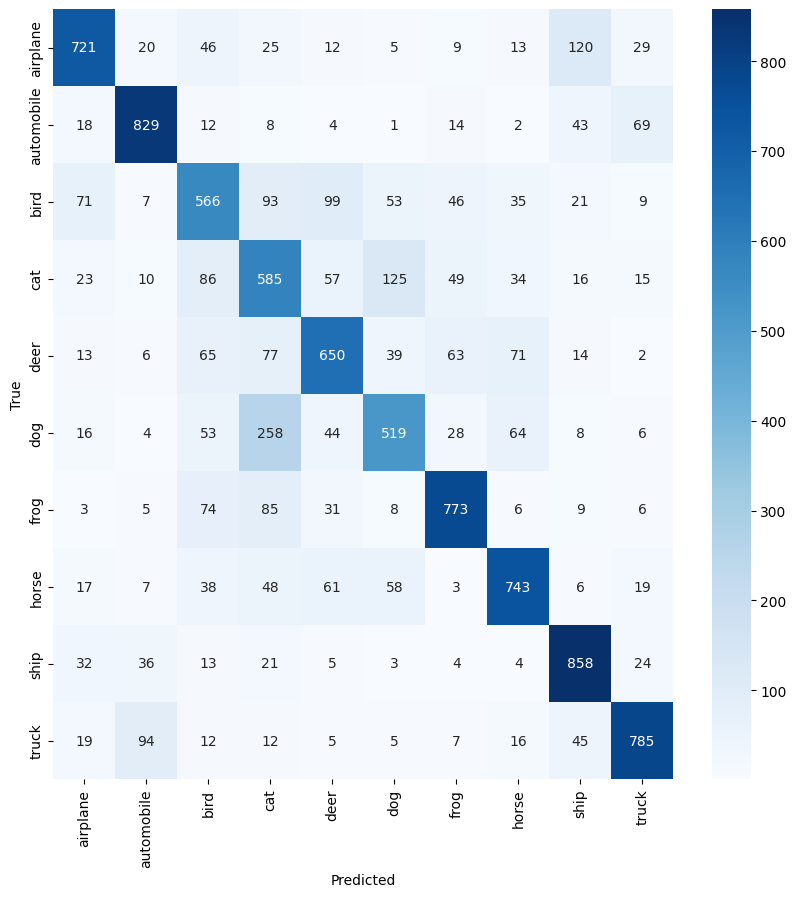

In [21]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_labels.flatten()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()